In [1]:
def PID(Kp, Ki, Kd, MV_bar=0):
    # initialize stored data
    e_prev = 0
    t_prev = -100
    I = 0
    
    # initial control
    MV = MV_bar
    
    while True:
        # yield MV, wait for new t, PV, SP
        t, PV, SP = yield MV
        
        # PID calculations
        e = SP - PV
        
        P = Kp*e
        I = I + Ki*e*(t - t_prev)
        D = Kd*(e - e_prev)/(t - t_prev)
        
        MV = MV_bar + P + I + D
        
        # update stored data for next iteration
        e_prev = e
        t_prev = t

In [2]:
from tclab import clock, setup, Historian, Plotter
import pandas as pd


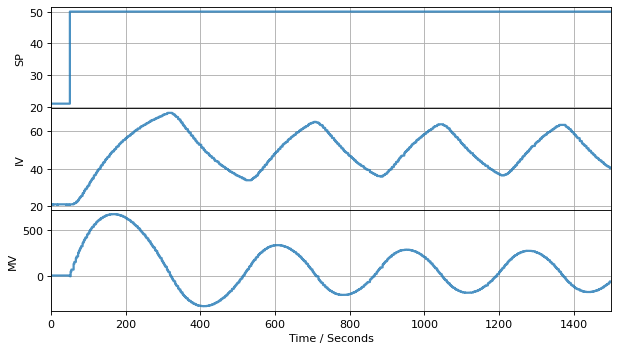

TCLab Model disconnected successfully.


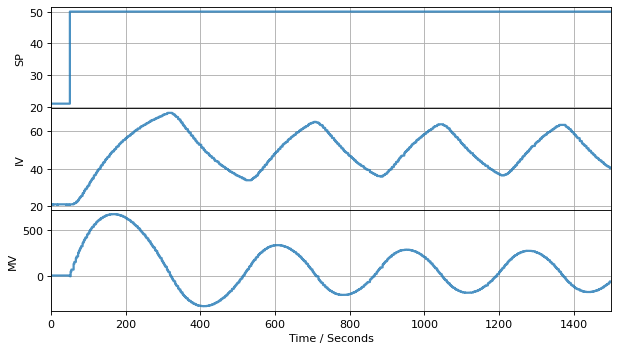

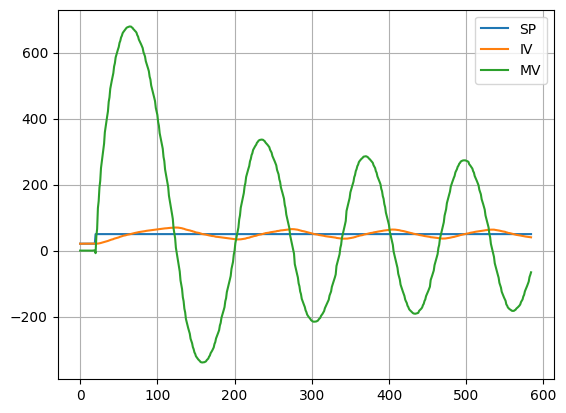

In [3]:
TCLab = setup(connected=False, speedup=10)

controller = PID( 0.04074532, 0.36756033, -2.1058128)        # create pid control
controller.send(None)              # initialize

tfinal = 1500

with TCLab() as lab:
    h = Historian([('SP', lambda: SP), ('IV', lambda: lab.T1), ('MV', lambda: MV)])
    p = Plotter(h, tfinal)
    T1 = lab.T1
    for t in clock(tfinal, 2):
        SP = T1 if t < 50 else 50           # get setpoint
        PV = lab.T1                         # get measurement
        MV = controller.send([t, PV, SP])   # compute manipulated variable
        lab.U1 = MV                         # apply 
        p.update(t)                         # update information display

    h.to_csv('pid.csv')
    data = pd.read_csv('pid.csv')
    data[['SP','IV', 'MV']].plot(grid=True)